# Analyzing the Stroop Effect


## Table of Contents
- [Introduction](#intro)
- [Question 1: Identify variables in the experiment](#variables)
- [Question 2a: Establish hypotheses](#hypotheses)
- [Question 2b: Establish a statistical test](#statistical-test)
- [Question 3: Report descriptive statistics](#descriptive-statistics)
- [Question 4: Plot the data](#plots)
- [Question 5: Perform the statistical test and interpret the results](#interpretation)
- [Question 6: Digging deeper and extending the investigation](#optional)


<a id='intro'></a>
### Introduction

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example <font color='red'>RED</font>, <font color='blue'>BLUE</font>. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example <font color='green'>PURPLE</font>, <font color='purple'>ORANGE</font>. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

<a id='variables'></a>
### Part I - Identify variables

**Independent variable**: This is the colors of the words.
<br>**Dependent variable**: This is the reaction time.

<a id='hypotheses'></a>
<a id='statistical-test'></a>
### Part II - Establish hypotheses and statistical test

</br>
**Null Hypothesis** (**$H_{0}$**): **$x̄_{c}$** $\ge$ **$x̄_{i}$** <br>
<br>*==> The reaction time for both conditions is equal or fewer, meaning the color mismatch has no impact on the reaction time. *

**Alternative Hypothesis** (**$H_{1}$**): **$x̄_{c}$** < **$x̄_{i}$** <br>
<br>*==> The reaction time is greater for the incongruent words condition.*

**$x̄_{c}$**: sample mean of the congruent data.<br>
**$x̄_{i}$**: sample mean of the incongruent data.<br>

The comparison of the mean is chosen as we look for the difference between the mean of variables. Also, the best statistical test in this case is the Paired T-test as we test for the difference between two related variables.
In addition, our sample has a size below 30 and an unknown population standard deviation.<br>

<a id='descriptive-statistics'></a>
### Part III - Descriptive Statistics

In [78]:
# To get started, let's import the libraries.

import pandas as pd
import numpy as np
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
sns.set_style(style="darkgrid")

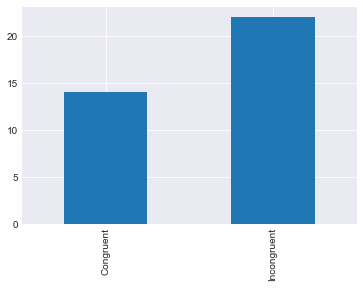

In [79]:
# Read in the data
df = pd.read_csv('stroopdata.csv')

# Set columns to lists to use in ttest function
cong = df['Congruent'].values.tolist()
incong = df['Incongruent'].values.tolist()

# Plot the means 
df.mean().plot('bar')


In [80]:
df.median()

Congruent      14.3565
Incongruent    21.0175
dtype: float64

In [81]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2056f5c0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a20fc47f0>]], dtype=object)

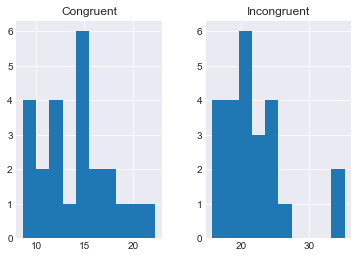

In [82]:
df.hist()

Here are two measures of central tendency and one measure of variability:

#### Congruent 
Mean: 14.05<br>
Median: 14.36<br>
Standard Deviation: 3.60<br>

#### Congruent 
Mean: 22.01<br>
Median: 21.02<br>
Standard Deviation: 4.80

<a id='plots'></a>
### Part IV - Plots

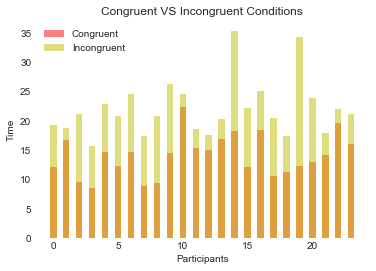

In [83]:
# Plot the chart
N = len(df.index)
congruent = df['Congruent']
incongruent = df['Incongruent']

ind = np.arange(N)  # the x locations
width = 0.50       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, congruent, width, color='r', alpha=0.5)
rects2 = ax.bar(ind, incongruent, width, color='y', alpha=0.5)

# Turns off grid on the left Axis.
ax.grid(False)

# Set background color
ax.set_facecolor("white")

# Add some text for labels, title and axes ticks
ax.set_ylabel('Time')
ax.set_xlabel('Participants')
ax.set_title('Congruent VS Incongruent Conditions')
ax.legend((rects1[0], rects2[0]), ('Congruent', 'Incongruent'))
plt.show()

This chart allows us to see the congruent data versus the incongruent ones. As expected, it takes more time for the participant to say the word in a different color out loud.

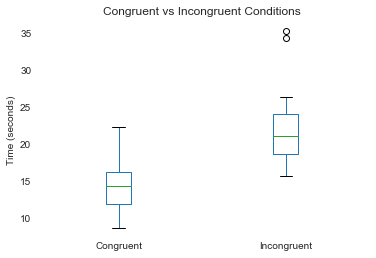

In [84]:
# Plot a second chart
title = 'Congruent vs Incongruent Conditions'
kind = 'box'
ax = df.plot(title=title, kind=kind)

# Turns off grid on the left Axis.
ax.grid(False)

# Set background color
ax.set_facecolor("white")

ylabel = plt.ylabel('Time (seconds)')


As seen before, the mean of the incongruent data is greater than the congruent one.

<a id='interpretation'></a>
### Part V - Statistical Test & Results

In [85]:
# Create a new column
df['Difference'] = df['Congruent'] - df['Incongruent']
print(df)

    Congruent  Incongruent  Difference
0      12.079       19.278      -7.199
1      16.791       18.741      -1.950
2       9.564       21.214     -11.650
3       8.630       15.687      -7.057
4      14.669       22.803      -8.134
5      12.238       20.878      -8.640
6      14.692       24.572      -9.880
7       8.987       17.394      -8.407
8       9.401       20.762     -11.361
9      14.480       26.282     -11.802
10     22.328       24.524      -2.196
11     15.298       18.644      -3.346
12     15.073       17.510      -2.437
13     16.929       20.330      -3.401
14     18.200       35.255     -17.055
15     12.130       22.158     -10.028
16     18.495       25.139      -6.644
17     10.639       20.429      -9.790
18     11.344       17.425      -6.081
19     12.369       34.288     -21.919
20     12.944       23.894     -10.950
21     14.233       17.960      -3.727
22     19.710       22.058      -2.348
23     16.004       21.157      -5.153


In [86]:
df.describe()

,Congruent,Incongruent,Difference
count,24.000000,24.000000,24.000000
mean,14.051125,22.015917,-7.964792
std,3.559358,4.797057,4.864827
min,8.630000,15.687000,-21.919000
25%,11.895250,18.716750,-10.258500
50%,14.356500,21.017500,-7.666500
75%,16.200750,24.051500,-3.645500
max,22.328000,35.255000,-1.950000


In [87]:
# Perform ttest
Tstat, Pvalue = stats.ttest_rel(cong,incong)

print ('T-statistic is', round(Tstat, 4))
print ('P-value is', round(Pvalue,10))

T-statistic is -8.0207
P-value is 4.1e-08


The confidence level is 99%.<br>
*Formula is: Standard Deviation of the mean difference / √n*

Because we stated an hypothesis with an equal sign, this is a two-tailed test.
Thus, the critical statistic value is 2.807 based on the t distribution table.
α = 0.01

The T-statistic is -8.02 as given above.
The P-value is 0.000000041.

Due to the P-value, which is lower than our alpha data (0.01), and based on the T-statistic (-8.02) that is smaller than the critical statistic value (2.807) the null hypothesis is rejected. As a matter of fact, the participants need more time to identify the color during the incongruent test. 
Finally, the result is as expected.

<a id='optional'></a>
### Part VI - Final thoughts

The participants need more concentration to say a word written in a color that is not the same than the word displayed. They need to focus on the word to recognize and make a distinction between the word and the ink color.
Also, it can depends on the age, the gender and the material used (wood, paper...). We'd need more data to dig further and see if there's a correlation with the potential reasons mentioned above. In addition, it can also depend on whether the participant is a native english speaker or not.


As for an alternative or similar task that would result in a similar effect, there is the [Colored Numbers Test](https://www.tandfonline.com/doi/abs/10.1080/13854040601186964?journalCode=ntcn20) but also the [Ishihara Test](https://en.wikipedia.org/wiki/Ishihara_test). In addition, [shapes](https://powersthatbeat.wordpress.com/2012/09/16/what-are-the-different-tests-for-the-stroop-effect-autismaid/) can be used, instead of using a list of words in specific colors.

**Resources**
* https://cyfar.org/types-statistical-tests
* http://www.statisticshowto.com/probability-and-statistics/t-test/
* http://www.statisticshowto.com/probability-and-statistics/confidence-interval/
* http://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/t-score-vs-z-score/
* https://www.mathsisfun.com/data/confidence-interval-calculator.html
* https://www.mathsisfun.com/data/confidence-interval.html
* https://matplotlib.org/examples/api/barchart_demo.html
* https://datascienceplus.com/standard-deviation-vs-standard-error/
* http://www.statisticshowto.com/one-tailed-test-or-two/
* http://www.statisticshowto.com/t-critical-value/
* http://www.statisticshowto.com/tables/t-distribution-table/


In [88]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Test_a_Perceptual_Phenomenon-The_Stroop_Effect-Final.ipynb'])

0